<a href="https://colab.research.google.com/github/xuanmse/python-for-engineer/blob/master/Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Thông tin   |               |
| ----------- | -----------   |
| MSSV        | 22mse23076    |
| Họ Và Tên   | KIEU VAN XUAN |

#**Hướng dẫn toàn diện để tìm hiểu về EDA + Phân tích chuỗi thời gian + Dự báo theo chuỗi thời gian SAMIMAX & Prophet**

#**Giới Thiệu:**

Cuộc thi này được đặt tên là M5-Forecasting, người tham gia cuộc thi này sẽ sử dụng dữ liệu bán hàng đã được phân loại và trích xuất từ công ty Walmart lớn nhất thế giới về doang thu để phân tích và dự đoán doanh số hàng ngày trong 28 ngày tiếp theo. 

Dữ liệu bán hàng chứa thông tin của 30,000 mặt hàng khác nhau được thu thập trong 1900 ngày. Dữ liệu đã được chia theo ba bang của Mỹ (California, Texas, and Wisconsin) bao gồm các thông tin: cấp độ, bộ phận, danh mục sản phẩm, chi tiết cấp độ cửa hàng. Ngoài ra, dữ liệu còn chứa các thông tin về giá, chương trình khuyến mãi, ngày trong tuần, các sự kiện đặc biệt. 

Tập dữ liệu mạnh mẽ này không chỉ giúp cải thiện dự báo chính xác mà còn giúp khám phá ra các mô hình bán hàng quan sát được thông qua các địa phương khác nhau, danh mục sản phẩm khác nhau để cung cấp các thông tin chi tiết giá trị về kinh doanh.



#**Đặt vấn đề**

Một tập dữ liệu lớn sẽ rất khó khăn trong việc tìm kiếm tất cả các mẫu cơ bản. Bằng việc sử dụng một số câu hỏi có tính chất SMART (từ tiếng anh viết tắt của specific, measureable, attainable, relevant and time-bound: cụ thể, đo lường được, có thể đạt được, có liên quan và giới hạn thời gian) rất hữu ích trong việc hiểu các mô hình. Nếu không tiếp cận một cách chính xác các thông tin có có ích có thể bị ẩn đi toàn bộ ngay từ lần tiên tiếp cận.

Bài toán cụ thể trong M5-Forecasting sẽ quan tâm đến việc tìm ra:


*   Sự phân phối tổng quan của sales_items (ids) thông qua danh mục như thế nào?
*   Hành vi của các danh mục thông qua các cửa hàng khác nhau như thế nào?
*   Id của mặt hàng đang bán chạy nhất?
*   Id cụ thể của các mặt hàng trong mỗi danh mục bán chạy nhất?
*   Doanh thu bán hàng thu được nhiều nhất là bao nhiêu? Có phải mặt hàng bán chạy nhất mang lại nhiều doanh thu nhất không hay có sự thay đổi theo xu hướng đó không?
*Hành vi của tổng doanh số bán hàng (hoặc doanh số trung bình) theo thời gian như thế nào
* hành vi bán các item_ids trong các ngày khác nhau trong tuần như thế nào? có bất kỳ ngày nào trong tháng có nhiều doanh thu nhất không? Xu thế như thế nào ở các cửa hàng khác nhau?






Và cuối cùng sử dụng mô hình SARIMAX và Prophet (phát triển bỡi Facebook) để dự báo doanh số bán hàng trong 28 ngày tiếp theo.


#**Phương pháp đánh giá**

Dự án này sử dụng khá nhiều phương pháp đánh giá lỗi để tối ưu hóa và tinh chỉnh mô hình hoặc để tìm độ chính xác cho mô hình dự báo theo chuỗi thời gian như sau:



1.   RMSE (Root Mean Square Error): Sử dụng để đánh giá dự báo bán hàng được tạo ra từ mô hình SARIMAX. Việc sử dụng chuổi thời gian, lấy số lượng bán hàng trung bình trong 1900 ngày bỏ qua việc sắp xếp id sản phẩm phân cấp kể cả các thứ tự khác. Việc lấy trung bình lượng bán hàng sẽ không ảnh hưởng đến phương pháp đánh giá RMSE do đó sẽ giúp tận dụng được vị trí trống của Id sản phẩm và số ngày.
2.   Custom Loss (WMAPE): Phương pháp này được sử dụng để đánh giá và tìm ra bộ tham số/hệ số tối ưu cho mô hình học Prophet của Facebook. Phương pháp này được sử dụng cho những trường hợp mà mức độ ưu tiên của Id sản phẩm và số lượng bán hàng được xem xét. Các hệ số / tham số được tạo ra bằng cách chia sự khác nhau của trung bình giá trị dự báo và giá trị thực tế.
3. WRMSSE (Weighted Root Mean Square Scaled Error): Để đánh giá mô hình đã được thiết kế, Điểm WRMSSE được tính khi dữ liệu dự đoán sẵn sàn (dự đoán tổng cộng 30,000 id sản phẩm). Điểm WRMSSE được tính toán yêu cầu dự trên toàn bộ Id sản phẩm và sự khác biệt giữa giá trị trong tập xác thực như sales_train_validation.csv  và dữ liệu dự báo đã được tính toán. Phương pháp đánh giá WRMSSE được cung cấp số liệu đã được tối ưu cho cuộc thi trong file sales_train_validation.csv. Để có thêm thông tin vui lòng truy cập: https://mofc.unic.ac.cy/m5-competition/




#**Khởi tạo**

###**Tải dữ liệu data đầu vào**

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! yes | mkdir /root/.kaggle
! yes | wget https://raw.githubusercontent.com/xuanmse/python-for-engineer/master/Asessment1/kaggle.json -P /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
--2022-10-29 14:05:24--  https://raw.githubusercontent.com/xuanmse/python-for-engineer/master/Asessment1/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘/root/.kaggle/kaggle.json.1’

kaggle.json.1       100%[===================>]      68  --.-KB/s    in 0s      

2022-10-29 14:05:24 (2.83 MB/s) - ‘/root/.kaggle/kaggle.json.1’ saved [68/68]



In [ ]:
!yes | kaggle competitions download -c m5-forecasting-accuracy -p /kaggle/input/
!yes | unzip /kaggle/input/m5-forecasting-accuracy.zip -d /kaggle/input/m5-forecasting-accuracy

 50% 23.0M/45.8M [00:00<00:00, 236MB/s]
100% 45.8M/45.8M [00:00<00:00, 247MB/s]
Archive:  /kaggle/input/m5-forecasting-accuracy.zip
replace /kaggle/input/m5-forecasting-accuracy/calendar.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /kaggle/input/m5-forecasting-accuracy/calendar.csv  
replace /kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv  
replace /kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv  
replace /kaggle/input/m5-forecasting-accuracy/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /kaggle/input/m5-forecasting-accuracy/sample_submission.csv  
replace /kaggle/input/m5-forecasting-accuracy/sell_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /kaggle/input/m5-forecas

###**Các thư viện cần thiết**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import time
import math
import datetime


# Import widgets
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

from math import log, floor
from sklearn.neighbors import KDTree

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

import itertools
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/m5-forecasting-accuracy.zip
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv


###**Thông tin của dữ liệu**

Thông tin của tập dữ liệu:


*   *calendar.csv*: Chứa thông tin về ngày bán và các thông tin khác về ngày nghỉ, và ngày dịp đặc biệt của sản phẩm được bán.
*   *train_sales_df.csv*: Chứa thông tin lịch sử bán hàng hàng ngày của mổi id sản phẩm, cửa hàng, bộ phận trong 1900 ngày [d_1 - d_1913]

* *submission_file.csv*: Định dạng đúng cho kết quả dự đoán bán hàng chứa id sản phẩm và id cột cho 28 ngày tiếp theo.
* *sell_prices_df.csv*: Chứa thông tin về giá của các sản phẩm được bán theo cửa hàng theo ngày.
* *sales_train_evaluation.csv*: Bao gồm doanh số bán hàng từ [d_1 - d_1941].



###**Tải tập dữ liệu lên bộ nhớ**


In [ ]:
sell_prices_df = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
train_sales_df = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
calendar_df = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/calendar.csv')
submission_file = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')  

###**Kiểm tra thông tin tập dữ liệu**

In [ ]:
sell_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [ ]:
train_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


Tập dữ liệu được cung cấp sẽ cho thấy các mối quan hệ giữa các cửa hàng, các sản phẩm cụ thể được bán, danh mục mà người tiêu dùng quan tâm nhất, thông tin bán hàng tại các khu vực cụ thể. sell_prices_df chứa thông tin của 6,841,121 sản phẩm, trong khi train_sales_df chứa thông tin của 30,490 sản phẩm bán ra.

Và tập dữ liệu calendar_df giúp thực hiện phân tích các sản phẩm bán ra theo chuổi thời gian

#**Khai phá dữ liệu**

##**Các câu hỏi về hành vi và nhu cầu sản phẩm theo thời gian.**



Bắt đầu bằng train_sales_df chứa các thông tin cụ thể về định danh sản phẩm (Id), khu vực sản phẩm ('store_id' , 'state_id'), ngày bán ra  (d_1 to d_1913). Phân tách dữ liệu theo ngày bán hàng để phân tích theo item_id, store_id và dept_id.

In [ ]:
train_sales_df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


In [ ]:
d_cols = [c for c in train_sales_df.columns if 'd_' in c]
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)
train_sales_df['avg_sales_all_days'] = train_sales_df[d_cols].mean(axis = 1)
train_sales_df['median_sales_all_days'] = train_sales_df[d_cols].median(axis = 1)
#train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

###**Phân phối sản phẩm (product_ids) theo danh mục**

In [ ]:
df = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')
fig = px.pie(df, values='total_entries', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Distribution of Product_IDs Across Categories')
fig.show()


Biểu đồ trên thể hiện phần trăm bán chạy của các sản phẩm theo thứ tự là sản phẩm thực phẩm bán chạy nhất, tiếp theo đến các mặt hàng gia dụng và cuối cùng là các sản phẩm thuộc về sở thích

In [ ]:
df = train_sales_df.groupby(['state_id'])['total_sales_all_days'].sum().reset_index()
fig = px.pie(df, values='total_sales_all_days', names='state_id', 
            color_discrete_sequence=px.colors.sequential.Aggrnyl,
            width = 750, height=450, title = 'Distribution of Total_Sales Across States')
fig.show()

Biểu đồ thể hiện tổng số lượng bán ra theo thứ tự CA nhiều nhất, đến Texas và cuối cùng là Wisconsin.

In [ ]:
df1 = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')
df2 = train_sales_df.groupby(['cat_id', 'state_id'])['total_sales_all_days'].sum().reset_index()

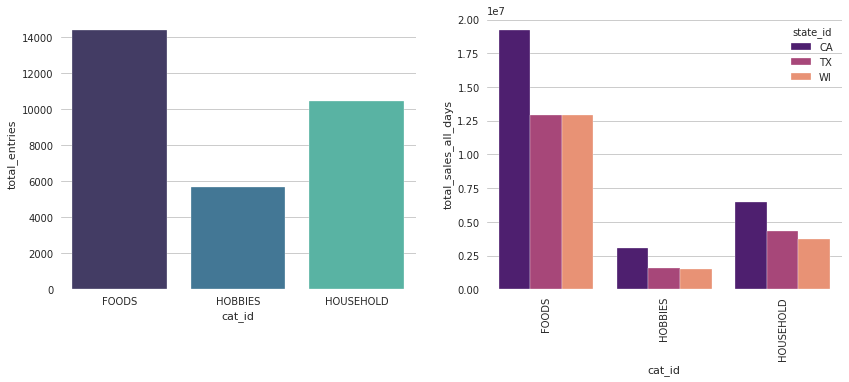

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

sns.barplot(x = 'cat_id', y='total_entries', data=df1, 
            palette='mako', ax=ax1)
sns.barplot(x = 'cat_id', y='total_sales_all_days', hue='state_id', data=df2, 
            palette='magma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

Hai biểu đồ trên cung cấp thông tin:


*   Danh mục bán chạy nhất là FOODS, tiếp theo là HOUSEHOLD và HOBBIES
* CA dẫn đầu về tổng số số lượng mặt hàng được bán ra trong cả ba danh mục. Trong khi Wisconsin đứng sau TX tại hai danh mục là HOUSEHOLD VÀ HOBBIES và tương đương về FOODS. 



In [ ]:
df = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category')
fig = px.bar(df, x="state_id", y="num_sales_by_category", 
             color="cat_id", title="Distribution of Product_ids Count Across Categories & Each Locale")
fig.show()

Biểu đồ trên thể hiện:


*   Các bặt hàng được bán ra nhiều nhất tại CA.
*   Các cửa hàng ở WI và TX có gần như cùng tổng bán ra trong 1913 ngày. Cần kiểm tra liệu doanh thu bán ra có tương tự, và các cửa hàng khác trên hai bang này có tương tự.



###**Phân phối sản phẩm theo cửa hàng**

In [ ]:
df = train_sales_df.groupby(['dept_id', 'store_id', 'state_id', 'cat_id'])[train_sales_df.columns[6:]].sum().reset_index()
df = df.sort_values('total_sales_all_days', ascending=False)

In [ ]:
x_dept = df['dept_id']
x_store = df['store_id']

def items_sold_per_days(x_spec,title_text, title):
    
    '''
    returns plotly plots with drop down menus for specified parameter made in dataframe earlier
    
    inputs: x_spec (categorical feature on the x_axis), title_text(title on dropdown), 
            title (title of the plot)
            
    returns: plotly plots of categorical feature (x_axis) with dropdowns on specific 
    number of days        
    '''
    
    cols = ['d_1', 'd_50', 'd_300', 'd_500', 'd_700', 'd_900', 'd_1100', 'd_1500', 'd_1700',
        'total_sales_all_days', 'median_sales_all_days']

    buttons1 = [dict(method = "restyle",
                 args = [{'x': [x_spec, 'undefined'],
                          'y': [df[cols[k]], 'undefined'],
                          'visible':[True, False]}], 
                 label = cols[k])   for k in range(0, len(cols))]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=x_spec, y = df['d_1'], name='Dept.Sales on day2',
                     marker_color='Crimson'))

    fig.update_layout(title_text= title_text,
                  title_x= 0.4, width=750, height=450, 
                  margin=dict(t=100, b=20, l=0, r=0),
                  autosize = False,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=0.08,
                                    y=1.13,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

    fig.add_annotation( x=0.00,  y=1.13, showarrow=False, xref='paper', yref='paper', xanchor='left',
                   text="With<br>"+str(title));
    fig.show()

items_sold_per_days(df['store_id'], 'Distribution of Sales Made on Each Store', 'Stores')
items_sold_per_days(df['state_id'], "Distribution of Sales Made In Each State", 'States')

Hai biểu đồ trên thể hiện:


*   Phân bổ doanh số bán hàng trên các dept_id
*  Phân bổ doanh số bán hàng trên các cửa hàng ở Texas và Wisconsin KHÔNG giống nhau mặt dùng tổng doanh số có thể giống nhau
* Các cửa hàng hoạt động tốt nhất tại mỗi khu vực lần lược là:  CA_3, TX_2 và WI_3.


###**Sản phẩm bán chạy nhất**

Sử dụng dữ liệu từ train_sales_df để xác định các mặt hàng được mua thường xuyên nhất

Lập biểu đồ hành vi để xác định hành vi chung về bán hàng trong các ngày nhất định

In [ ]:
train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

id
FOODS_3_090_CA_3_validation        250502
FOODS_3_586_TX_2_validation        192835
FOODS_3_586_TX_3_validation        150122
FOODS_3_586_CA_3_validation        134386
FOODS_3_090_CA_1_validation        127203
                                    ...  
FOODS_2_071_TX_3_validation            16
FOODS_2_057_WI_2_validation            16
HOBBIES_1_170_WI_3_validation          13
FOODS_3_778_CA_2_validation            12
HOUSEHOLD_1_020_CA_3_validation        10
Name: total_sales_all_days, Length: 30490, dtype: int64

Dữ liệu trên cho thấy tổng số sản phẩm bán được đã được group theo Id. và mặt hàng FOODS_3_090_CA_3_validation đang được bán ra nhiều nhất

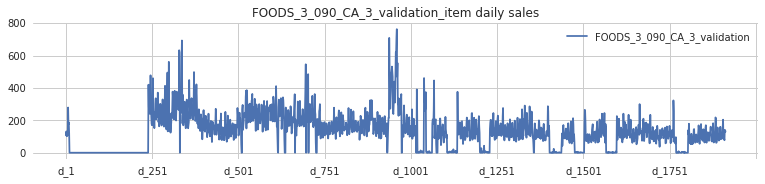

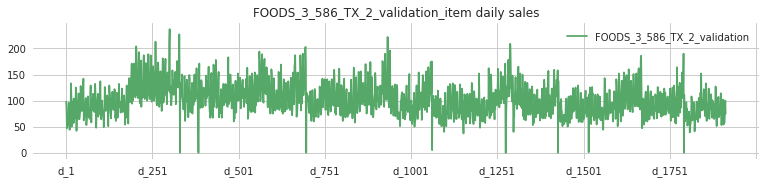

In [ ]:
sns.set_style('whitegrid')

def plot_dailysales(spec_id):
    """
    plots the behavior of dailysales of specific ids i.e. spec_id
    
    input: spec_id
    returns : number of sales plotted across number of days 
    """
    train_sales_df.loc[train_sales_df['id'] == spec_id ].set_index('id')[d_cols]\
                .T\
                .plot(figsize = (13,2.5),
                      title =  str(spec_id)+"_item daily sales", 
                      color = next(color_cycle) )
    plt.legend()
    plt.show()

plot_dailysales('FOODS_3_090_CA_3_validation') 
plot_dailysales('FOODS_3_586_TX_2_validation')


###**Mặt hàng bán chạy nhất trên mỗi danh mục**

In [ ]:
df_agg = pd.DataFrame(train_sales_df.groupby(['id', 'cat_id', 'store_id'])['total_sales_all_days'].sum().sort_values(ascending=False))
df_agg = df_agg.reset_index()
df_agg.head(3)

,id,cat_id,store_id,total_sales_all_days
0,FOODS_3_090_CA_3_validation,FOODS,CA_3,250502
1,FOODS_3_586_TX_2_validation,FOODS,TX_2,192835
2,FOODS_3_586_TX_3_validation,FOODS,TX_3,150122


Lấy ra 3 danh mục só số lượng bán chạy nhất được sắp xếp theo thứ tự giảm dần

In [ ]:


print("The 3 item_ids outselling most in FOODS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'FOODS']['id'][:3])))
print("The 3 item_ids outselling most in HOUSEHOLDS category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOUSEHOLD']['id'][:3])))
print("The 3 item_ids outselling most in HOBBIES category are: {}".format(list(df_agg.loc[df_agg['cat_id'] == 'HOBBIES']['id'][:3])))



The 3 item_ids outselling most in FOODS category are: ['FOODS_3_090_CA_3_validation', 'FOODS_3_586_TX_2_validation', 'FOODS_3_586_TX_3_validation']
The 3 item_ids outselling most in HOUSEHOLDS category are: ['HOUSEHOLD_1_118_CA_3_validation', 'HOUSEHOLD_1_459_CA_3_validation', 'HOUSEHOLD_1_334_CA_3_validation']
The 3 item_ids outselling most in HOBBIES category are: ['HOBBIES_1_234_CA_3_validation', 'HOBBIES_1_348_CA_1_validation', 'HOBBIES_1_371_CA_1_validation']


3 sản phẩm bán chạy nhất trên mỗi danh mục bán chạy nhất

In [ ]:
def plot_sample_sales(spec_id, sm_start, sm_end, samples_pick=50):
    """
    plots sample sales data with selection point and ending point specified, along with
    samples_pick point that specifies the samples picked after specified intervals
    
    input: spec_id (item_id or id), sm_start (sample_start), sm_end(sample_end),
    samples_pick (samples picked after how many intervals)
    
    returns: outputs a graph of sample points plotted against daily sales data d_1 to d_1913
    """
    fig, ax1 = plt.subplots(figsize=(13, 2.5))
    
    x1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .columns)[sm_start:sm_end]
    y1 = list(train_sales_df[train_sales_df['id'] == spec_id][d_cols]\
              .values.flatten())[sm_start:sm_end]
    
    #this conversion for regplot only
    x1 = [x.replace("d_", "") for x in x1]
    x1 = [int(x) for x in x1]
    
    #sns.lineplot(x=x1, y=y1, ax=ax1)
    sns.regplot(x=x1, y=y1, order=10, ax=ax1)
    ax1.set_ylabel("Number of Sales")
    ax1.set_xlabel("Days")

    ax1.set_xticks(x1[::samples_pick])
    ax1.set_xticklabels(x1[::samples_pick], rotation=0)

    fig.tight_layout()
    plt.show()

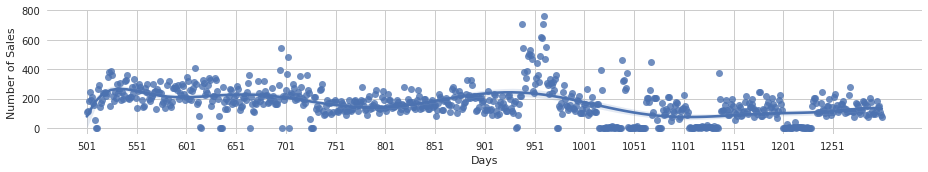

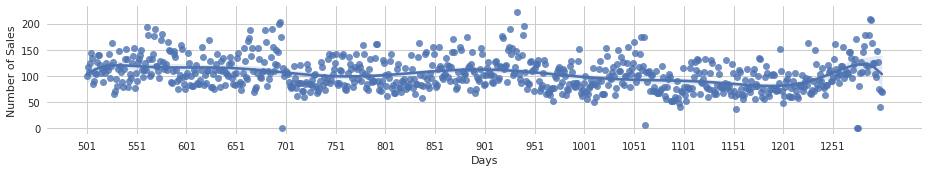

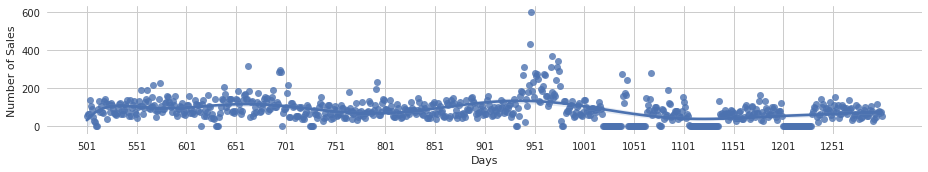

In [ ]:


plot_sample_sales('FOODS_3_090_CA_3_validation', 500, 1300)
plot_sample_sales('FOODS_3_586_TX_2_validation', 500, 1300)
plot_sample_sales('FOODS_3_090_CA_1_validation', 500, 1300)



Biều đồ mô hình hồi quy thể hiện xu hướng bán các mặt hàng: FOODS_3_090_CA_3_validation, FOODS_3_586_TX_2_validation,FOODS_3_090_CA_1_validation từ ngày thứ 500 đến ngày thứ 1300 (cận trên và cận dưới thể hiện những ngày đặt biệt thúc đẩy doanh số bán hàng)

##**Những câu hỏi về doanh thu bán hàng**

Cần tìm hiểu doanh thu cục thể với từng sản phẩm. Nhưng tập dữ liệu sell_price_df không cung cấp thông tin về product_id (mã sản phẩm) và có sự không khớp dữ liệu giữa hai tập train_sales_df với 30,490 mặt hàng và tập sell_prices_df với 6,841,121 mục. Do đó cần sử dụng phương pháp ước tính sơ bộ để hợp nhất hai tập dữ liệu

Vì tập sell_prices_df có phân loại dữ liệu theo cấp, vì vậy có thể ước tính về các mặt hàng được bán trong từng danh mục để xem xét giá được bán của từng mặt hàng được bán là bao nhiêu.



In [ ]:
sell_prices_df.head(3)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26


Lấy ra 3 dòng đầu tiên của dữ liệu

In [ ]:
# making a new column category out of the item_id 
sell_prices_df['category'] = sell_prices_df['item_id'].str.split("_", expand=True)[0]


Tạo cột danh mục dữ liệu từ thông tin item_id

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



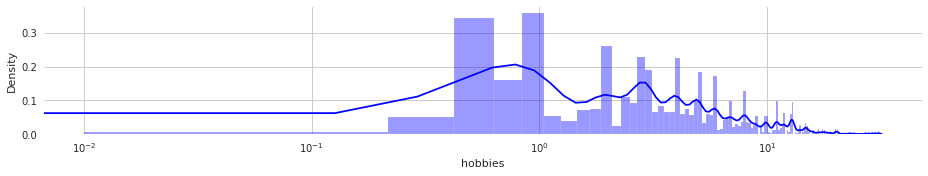

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



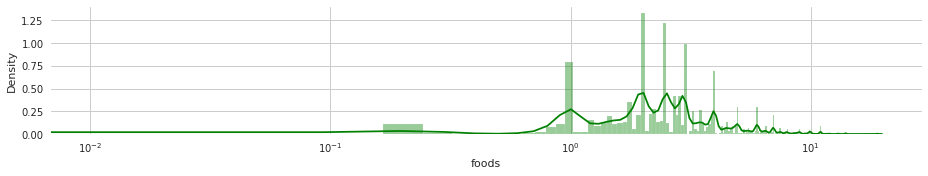

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



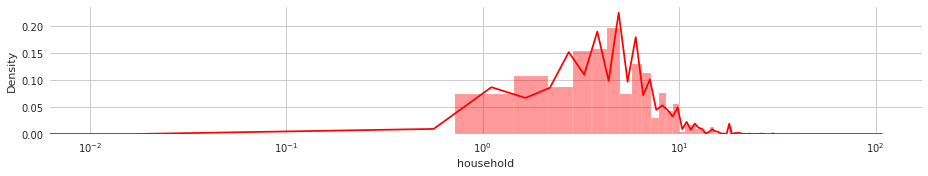

In [ ]:
sns.set_style('whitegrid')
#plt.figure(figsize=(15,5))

def kde_plotting(df, category, bin_size, color, label):
    
    '''
    plots the kde density plot of the continuous features of df specified
    
    inputs: df, category(whether, foods, household or hobbies), bin_size(bin size for histogram)
            color (color of the plot), label (label to the plot)
    returns: kde plots with logarithmic scale taken on x_axis
            
    '''
    fig, ax1 = plt.subplots(figsize=(13, 2.5) )

    sns.distplot(df[df['category'] == category]['sell_price'], 
               axlabel = label ,bins=bin_size, color = color, ax=ax1) 

    fig.tight_layout()
    ax1.set_xscale('log')
    plt.legend()
    plt.show()
    
kde_plotting(sell_prices_df, 'HOBBIES', 150, 'b', 'hobbies')   
kde_plotting(sell_prices_df, 'FOODS', 250, 'g', 'foods') 
kde_plotting(sell_prices_df, 'HOUSEHOLD', 150, 'r', 'household') 

Sử dụng biểu đồ phân phối theo mật độ để trích xuất các thông tin:


*   Các mặt hàng gia dụng tuân theo phân phối gần như chuẩn và có giá trung bình là 5dollars và hầu hết các mặt hàng gia dụng đều được bán trong giá từ 1$ đến 10dollars. Khung giá của mặt hàng gia dụng là từ 25xu đến 10dollars
*   Các mặt hàng thực phẩm phân phối đa phương, cho thấy người tiêu dùng quan tâm đến nhiều mặt hàng khác nhau với danh mục và giá trị khác nhau. Khung giá của mặt hàng thực phẩm là từ 2 xu đến 10dollars và rất ít mặt hàng nằm ngoài khung giá
*   Các mặt hàng thuộc về sở thích phân phối theo nhiều đỉnh nhỏ khác nhau với giá trị cao thấp khách nhau cho thấy người tiêu dùng quan tâm đặc biệt đến một số sản phẩm nhất định






###**Loại bỏ các phân phối ngoại lai để quan sát phân phối về giá**

In [ ]:
def remove_outliers(df):
    
    '''
    removes the outliers in continous features using quartile ranges
    
    inputs: df(df specified with continous features along side categorical features)
    returns: df with removed outliers
    '''
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    return df_final

df = sell_prices_df[['category', 'sell_price']]
df = remove_outliers(df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Sử dụng phương pháp lọc nhiễu phần tư

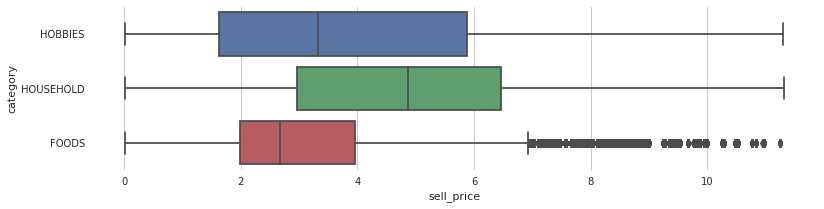

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.boxplot(y=df['category'], x=df['sell_price'])
plt.show()

Sau khi lọc nhiễu:

*   Danh mục thức ăn: 75% các mặt hàng bán ra dưới 4dollars
* Danh mục sở thích: 75% các mặt hàng bán ra dưới 6dollars và giá trung bình tập trung từ 3,25dollars đến 3,5dollars
* Danh mục gia dụng: 75% mặt hàng bán dưới 6,5dollars

Sau khi lọc nhiều và so sánh với kết quả ban đầu cho thấy rất nhiều nhiễu trong dữ liệu về giá



##**Phân phối doanh số vào các ngày trong tuần và các dịp đặc biệt**


Tập dữ liệu canlendar_df chứa các thông tin có giá trị theo thời gian của các sản phẩm theo product_id. Tập dữ liệu này chũng chứa các thông tin về các dịp đặc biệt và SNAP (chương trình hỗ trợ dinh dưỡng bổ xung).
Tập dữ liệu train_sales_df chứa nhiều thông tin về doanh số bán hàng cùng các ngày trong tuần, các ngày cụ thể và các dịp đặc biệt

In [ ]:
calendar_df.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


Thông tin tập dữ liệu calendar_df.

In [ ]:
calendar_df.groupby(['event_name_1', 'event_type_1'])['wday'].count()

event_name_1         event_type_1
Chanukah End         Religious       5
Christmas            National        5
Cinco De Mayo        Cultural        5
ColumbusDay          National        5
Easter               Cultural        5
Eid al-Fitr          Religious       5
EidAlAdha            Religious       5
Father's day         Cultural        4
Halloween            Cultural        5
IndependenceDay      National        5
LaborDay             National        5
LentStart            Religious       6
LentWeek2            Religious       6
MartinLutherKingDay  National        5
MemorialDay          National        6
Mother's day         Cultural        6
NBAFinalsEnd         Sporting        6
NBAFinalsStart       Sporting        6
NewYear              National        5
OrthodoxChristmas    Religious       5
OrthodoxEaster       Religious       5
Pesach End           Religious       6
PresidentsDay        National        6
Purim End            Religious       6
Ramadan starts       Religious

Việc quan sát phân bố dữ liệu trong *"event_name_1"* và *event_type_1* liên quan đến ngày lễ và dịp đặc biệt kế hợp với dữ liệu về doanh số bán hàng sẽ cung cấp các xu hướng quan trọng

In [ ]:
calendar_df.groupby(['event_name_2', 'event_type_2'])['wday'].count()

event_name_2    event_type_2
Cinco De Mayo   Cultural        1
Easter          Cultural        1
Father's day    Cultural        2
OrthodoxEaster  Religious       1
Name: wday, dtype: int64

Dữ liệu trên cho thấy có một số dữ liệu nằm trong các danh mục khác ngoài *"event_name_1"*

In [ ]:
#Making in and including a new entry of days as well as merging the events_1 and event_2 into
# a single new events_names and types category

calendar_df['days'] = [d.split('-')[2] for d in calendar_df['date']]
calendar_df['events_names'] = pd.concat([calendar_df['event_name_1'], calendar_df['event_name_2']], 
                                        ignore_index=True)
calendar_df['events_types'] = pd.concat([calendar_df['event_type_1'], calendar_df['event_type_2']], 
                                        ignore_index=True)
#calendar_df.drop(['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], axis=1, inplace=True)

Kết hợp hai tập dữ liệu *"event_name_1"* và tập dữ liệu *"event_name_2"*

###**Dữ liệu SNAP_CA, SNAP_TX, SNAP_WI là gì?**

SNAP là cụm từ viết tắc tiếng anh của chương trình "hỗ trợ dinh dưỡng bổ sung" liên bang của Hoa Kỳ nhầm cung cấp thực phẩm thiết yếu cho những hộ gia đình có thu nhập thấp. Danh mục các vận dụng gia đình và các vật dụng sở thích không nằm trong chương trình này. Chương trình này nhằm chống lại nạn đói thực phẩm ở Mỹ

In [ ]:
df = calendar_df.groupby(['events_types'])['snap_CA'].value_counts().reset_index(name='counts')

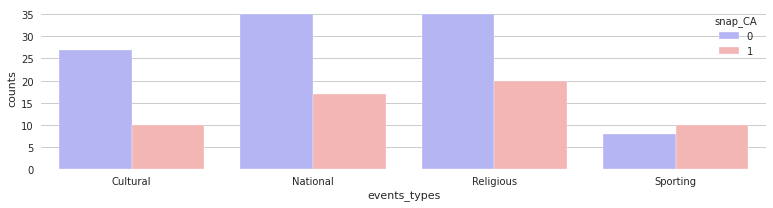

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_types', y='counts', hue='snap_CA', data=df, palette='bwr')
plt.show()

In [ ]:
df = calendar_df.groupby(['events_names'])['snap_CA'].value_counts().reset_index(name='counts')

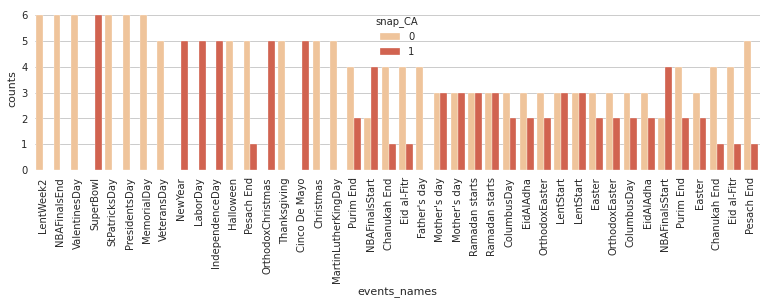

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.figure(figsize=(13,3))
sns.barplot(x = 'events_names', y='counts', hue='snap_CA', data=df, 
            order = df.sort_values(['counts'], ascending=False).events_names, 
            palette='OrRd')
plt.xticks(rotation=90)
plt.show()

Hai biểu đồ trên biểu thị chương trình SNAP ở CA được sử dụng trong các dịp đặc biệt.

##**Phân phối của doanh số bán hàng và doanh thu bán hàng**

Hợp nhất dữ liệu liên quan đến sản phẩm và doanh thu dựa trên product_id và revenue_df để khai phá các xu hướng của dữ liệu item_specific_data và sale_price_specific

In [ ]:
train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days,median_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,3,0,1,1,600,0.313643,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,493,0.257710,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,1,1,288,0.150549,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,1,0,1,3,7,2,3288,1.718766,1.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,2,2,2,4,1849,0.966545,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,1,0,0,1,1022,0.534239,0.0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,1,0,720,0.376372,0.0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,0,1,0,0,1,0,1712,0.894929,0.0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,3,1,3,702,0.366963,0.0


In [ ]:

train_sales_prices_df = train_sales_df.merge(sell_prices_df, how='inner',
                                            left_index=True, right_index=True, 
                                            validate="1:1")


In [ ]:
train_sales_prices_df

,id,item_id_x,dept_id,cat_id,store_id_x,state_id,d_1,d_2,d_3,d_4,...,d_1912,d_1913,total_sales_all_days,avg_sales_all_days,median_sales_all_days,store_id_y,item_id_y,wm_yr_wk,sell_price,category
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,600,0.313643,0.0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,493,0.257710,0.0,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,288,0.150549,0.0,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,7,2,3288,1.718766,1.0,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,1849,0.966545,1.0,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,1,1022,0.534239,0.0,CA_1,HOBBIES_1_135,11445,20.38,HOBBIES
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,720,0.376372,0.0,CA_1,HOBBIES_1_135,11446,20.38,HOBBIES
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,1,0,1712,0.894929,0.0,CA_1,HOBBIES_1_135,11447,20.38,HOBBIES
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,3,702,0.366963,0.0,CA_1,HOBBIES_1_135,11448,20.38,HOBBIES


In [ ]:


df = train_sales_prices_df.groupby(['cat_id', 'state_id', 'store_id_x'])['sell_price'].sum().reset_index(name='total_revenue')
df = df.sort_values(by='total_revenue', ascending=False)



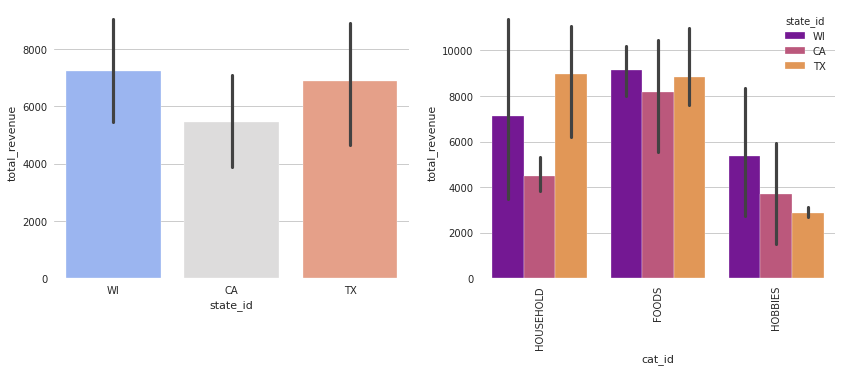

In [ ]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

sns.barplot(x = 'state_id', y='total_revenue', data=df, 
            palette='coolwarm', ax=ax1)
sns.barplot(x = 'cat_id', y='total_revenue', hue='state_id', data=df, 
            palette='plasma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

Một số thông tin quan trọng được đưa ra dựa trên hai biểu đồ trên:
* Mặt dù bang CA luôn là một bang bán được nhiều product_id, nhưng bang có doanh thu cao nhất là WI
* Tương tự với danh mục ban WI và TX có doanh thu cao hơn bang CA.
* WI dẫn đầu doanh số về danh mục thức ăn và giải trí, TX dẫn đầu về vật dụng gia đình.
* Bang CA đóng góp doanh thu thấp nhất, nhưng có doanh số tại các cửa hàng cao nhất.


# **Phân tích hành vi trên chuỗi thời gian**

Hợp nhất tập dữ liệu chứa product_ids và thông tin dữ liệu theo thời gian để phân tích các hành vi theo thời gian: doanh số bán hàng, các tác động cụ thể, cuối tuần hoặc các dịp đặc biệt có thể có đối với doanh số.

**Trung bình trượt**: Sử dụng phương pháp trung bình trượt để làm mượt dữ liệu để dễ dàng phân tích liên hệ của doanh số bán hàng, tồn kho theo thời gian


##**Phân phối của doanh số product_id theo thời gian**

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')
train_sales_cal_df['total_sales'] = train_sales_cal_df.sum(axis=1)

Kết hợp tập dữ liệu doanh số và tập dữ liệu thời gian (lịch)
Tính toán doanh số theo ngày

In [ ]:
train_sales_cal_df = train_sales_cal_df[['total_sales']]
train_sales_cal_df = train_sales_cal_df.reset_index()

Cấu trúc lại dữ liệu để trực quan hóa

In [ ]:
fig = px.line(train_sales_cal_df, x='date', y="total_sales", 
             template = 'plotly_white', title = 'Total Sales by Product id', 
             width=800, height=450)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all")
            ]) 
                      ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

Trực quan hóa dữ liệu doanh số theo thời gian bằng biểu đồ đường

Sử dụng biểu đồ này sẽ có khó để xác định xu hướng doanh số cục bộ và tính theo mùa của tập dữ liệu. Mặt dù có xu hướng ngày càng tăng doanh số, nhưng rất khó xác định các bức tranh về doanh số theo biểu đồ này

Sử dụng môdun season_decompose trong statsmodel (mô hình thống kê) để xác định các xu hướng theo thời gian. Sử dụng phương pháp lặp theo mùa để xác định sự thay đổi về doanh thu theo thời gian

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def time_series_decompose(df, model_specified, period):

    '''
    returns decomposed time series components (with seasonality, trend and residuals ) of time_series df
    
    inputs: df(time series df), model_specified (whether additive or multiplicative ), period(number of days)
    returns: trend values, seasonality values and residual values of time_series df
    
    '''
    df_decomposition = seasonal_decompose(
                               x=df.set_index(['date']), 
                               model= model_specified, 
                               period=period)
    
    est_trend = df_decomposition.trend
    est_trend = est_trend.reset_index(name='trend').set_index('date')
    est_seasonal = df_decomposition.seasonal
    est_seasonal = est_seasonal.reset_index(name='seasonal').set_index('date')
    est_residual = df_decomposition.resid
    est_residual = est_residual.reset_index(name='resid').set_index('date')
    
    return est_trend, est_seasonal, est_residual

sample_time_s1 = train_sales_cal_df[400:700]
est_trend, est_seasonal, est_residual = time_series_decompose(sample_time_s1, 
                                                              'multiplicative', 30)


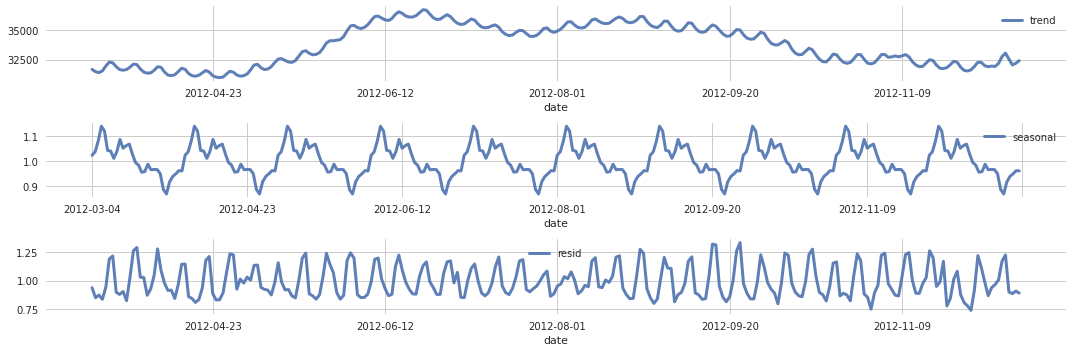

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 7))

est_trend.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax1)
est_seasonal.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax2)
est_residual.plot(figsize=(15, 5) ,
                 alpha=0.9, 
                 lw=3, ax = ax3)

fig.tight_layout()
plt.show()

Nhìn vào biểu đồ xu hướng, theo mùa, tồn dư có thể xác định được những thông tin sau:
* Có tính chắc chắn của tính thời vụ trong tập dữ liệu
* Có thể nhận thấy xu dướng theo mùa và phần dư có xu hướng lặp hành vi

In [ ]:
train_sales_cal_df = train_sales_cal_df.set_index('date')

In [ ]:
def time_and_rolling_plot(df, title_text, rolling_days=30, height=2.2):

    '''
    plots the time_series of dailysales made along with rolling mean plot
    
    inputs: df, title_text(plot title), rolling_days (rolling mean to be taken across), 
            height(height of the plot to be specified)
            
    returns: time series plot and rolling mean plot of the variable specified 
    '''
    sns.set_style('whitegrid')
    fig, ax1 = plt.subplots(1, 1, figsize=(13, height))
    df.plot(figsize=(13, height),
                        alpha=0.8,
                        title="Time Plot for the " + str(title_text), 
                        lw=2, color=next(color_cycle), ax=ax1)
    df.rolling(rolling_days).mean().plot(figsize=(13, height),
                                          alpha=1, 
                                          legend="Rolling Mean on 30 days", 
                                          lw=2.5, color=next(color_cycle), ax=ax1)
    ax1.legend(['Total Sales Per Category', 'total_sales_rolling_mean'])
    plt.show()


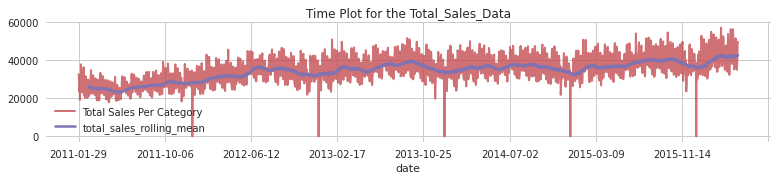

In [ ]:
time_and_rolling_plot(train_sales_cal_df, 'Total_Sales_Data')

Nhìn vào biểu đồ cho thấy doanh số tăng đều đặn:
* Cần theo dõi số lượng mặt hàng còn trong kho.
* Lập biểu đồ doanh số của một vài mặt hàng để xem xét hành vi theo thời gian.

In [ ]:
train_sales_most_sold_25 = train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)[:25]
train_sales_most_sold_25 = train_sales_most_sold_25.reset_index(name='total_sales')
train_sales_most_sold_25.iloc[0:5]

,id,total_sales
0,FOODS_3_090_CA_3_validation,250502
1,FOODS_3_586_TX_2_validation,192835
2,FOODS_3_586_TX_3_validation,150122
3,FOODS_3_586_CA_3_validation,134386
4,FOODS_3_090_CA_1_validation,127203


Lấy ra danh sách 25 sản phẩm bán chạy nhất

In [ ]:
train_sales_most_sold_25['state'] = train_sales_most_sold_25['id'].str.split("_", expand=True)[3]
train_sales_most_sold_25.groupby(['state'])['total_sales'].sum().sort_values(ascending=False)

state
TX    1233196
CA    1005717
WI     470367
Name: total_sales, dtype: int64

Top 25 doanh số, TX có nhiều mặt hàng hơn so với CA hoặc WI

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

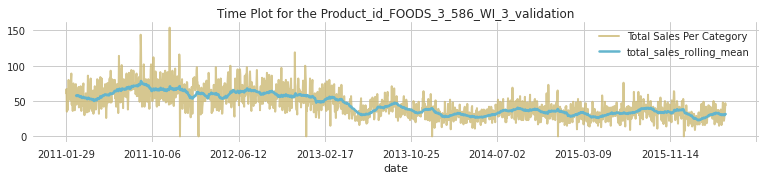

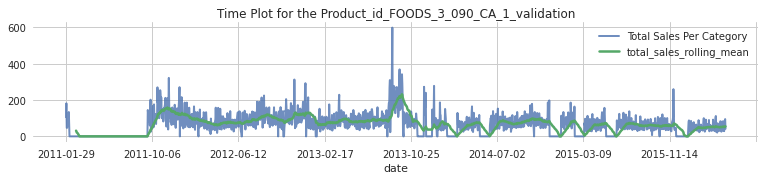

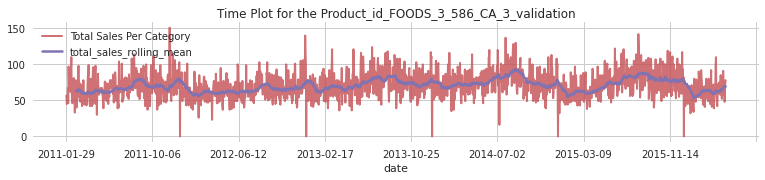

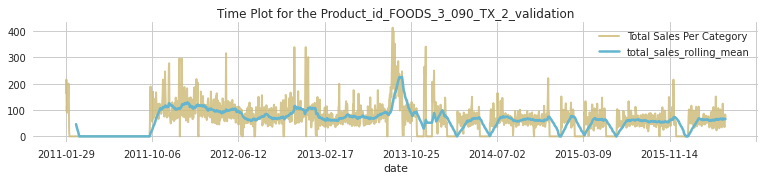

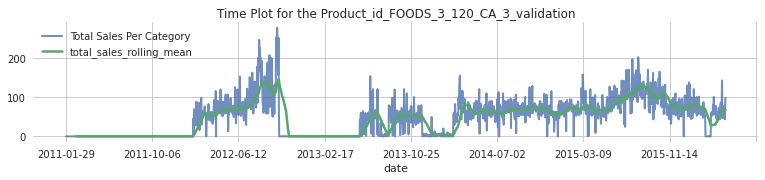

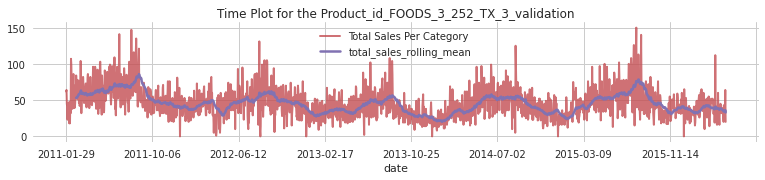

In [ ]:
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_586_WI_3_validation']], "Product_id_FOODS_3_586_WI_3_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_090_CA_1_validation']], "Product_id_FOODS_3_090_CA_1_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_586_CA_3_validation']], "Product_id_FOODS_3_586_CA_3_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_090_TX_2_validation']], "Product_id_FOODS_3_090_TX_2_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_120_CA_3_validation']], "Product_id_FOODS_3_120_CA_3_validation")
time_and_rolling_plot(train_sales_cal_df[['FOODS_3_252_TX_3_validation']], "Product_id_FOODS_3_252_TX_3_validation")

## Phân phối tổng doanh số trên mỗi loại

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['cat_id'])[d_cols].sum().\
                                                T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df.head(2)

,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634


In [ ]:
def plotly_time_plot_markers(df, text, samples_onwards=1000):

    '''
    plots time_series plotly scatter plot of the format specified in df 
    
    inputs: df(dataframe), text(title text ), samples_onwards (time_series_sample and the end)
    returns : plotly time series scatter plot
    
    '''
    fig = go.Figure()
    for c in df.columns[:4]:
        fig.add_traces(go.Scatter(x=train_sales_cal_df[samples_onwards:].index, 
                              y=train_sales_cal_df[samples_onwards:][c],
                              mode='markers',
                              name = c))

    fig.update_layout( title = 'Sales per Day by ' + str(text), template = 'plotly_white',
        width=750, height=550,
        xaxis_tickformatstops = [
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
        ]
    )
    
    fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all") ])  ),
        rangeslider=dict(
            visible=True
        ),
        type="date" ) )

    fig.update_xaxes(rangeslider_visible=True)    
    fig.show()    

plotly_time_plot_markers(train_sales_cal_df, 'Category')  


Dự vào biểu đồ cho thấy:
* có sự gia tăng về doanh số bán hàng theo thời gian.
* các sản phẩm về thức ăn hoặc gia dụng tăng nhanh hơn so với mặt hàng giải trí.


##**Phân phối tổng doanh số bán ra trên mỗi bang**

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['state_id'])[d_cols].sum().T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df

,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-04-20,15148,9600,10595
2016-04-21,14488,9602,10943
2016-04-22,17095,10615,12807


In [ ]:
from plotly.subplots import make_subplots

def plotly_time_plot_rolling(df, text, start_col=0, end_col=3, rolling_days=30):

    '''
    time series rolling plots of the categories specified in df
    inputs: df (dataframe with ts as index, and columns as categories), text (title of the plot)
            rolling_days (number of rolling days)
    
    returns: plotly time series plot of sales along the categories specified as columns in df
    '''
    fig = go.Figure()
    for c in df.columns[start_col:end_col]:
        fig.add_traces(go.Scatter(x=df.rolling(rolling_days).mean().index, 
                              y=df.rolling(rolling_days).mean()[c],
                              mode='lines+markers',
                              name = c))

    fig.update_layout( title = 'Sales per Day by ' + str(text), template = 'plotly_white',
        width=750, height=550,
        xaxis_tickformatstops = [
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
        ]
    )
    
    fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all") ])  ),
        rangeslider=dict(
            visible=True
        ),
        type="date" ) )

    fig.update_xaxes(rangeslider_visible=True)    
    fig.show()   

plotly_time_plot_rolling(train_sales_cal_df, 'State')

Doanh số bán hàng có tăng trê cả ba bang CA, TX, WI. Nhưng có thêm một số điểm:
* Tổng doanh số của các mặt hàng trên tất cả các bang đều tăng.
* Doanh số của bang WI cắt TX vào 14 tháng 10 và 15 tháng 9 cho thấy có sự tăng trưởng bán hàng theo mùa. 


In [ ]:
train_sales_cal_df = train_sales_df.groupby(['state_id', 'cat_id'])[d_cols].sum().T\
              .join(pd.concat([calendar_df.set_index('d')['date']], axis=1, keys=['dates']))
train_sales_cal_df.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)



,"(CA, FOODS)","(CA, HOBBIES)","(CA, HOUSEHOLD)","(TX, FOODS)","(TX, HOBBIES)","(TX, HOUSEHOLD)","(WI, FOODS)","(WI, HOBBIES)","(WI, HOUSEHOLD)",dates
d_1,10101,1802,2292,6853,879,1706,6224,1083,1691,2011-01-29
d_2,9862,1561,2382,7030,870,1730,5866,926,1522,2011-01-30


In [ ]:
select_cols_ca = [c for c in train_sales_cal_df.columns if 'CA' in c]
select_cols_tx = [c for c in train_sales_cal_df.columns if 'TX' in c]
select_cols_wi = [c for c in train_sales_cal_df.columns if 'WI' in c]
#train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)
#train_sales_cal_df = 
df_CA = train_sales_cal_df.set_index('dates')[select_cols_ca]
df_TX = train_sales_cal_df.set_index('dates')[select_cols_tx]
df_WI = train_sales_cal_df.set_index('dates')[select_cols_wi]

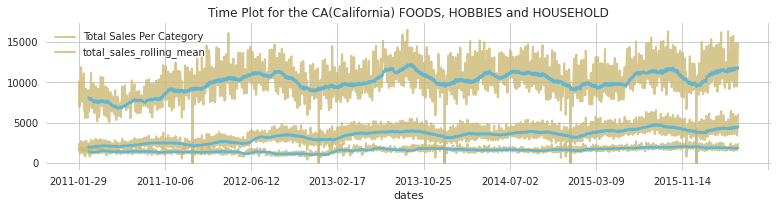

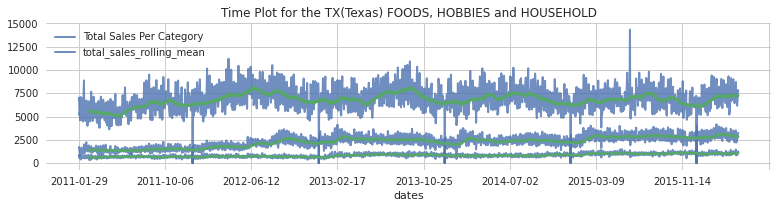

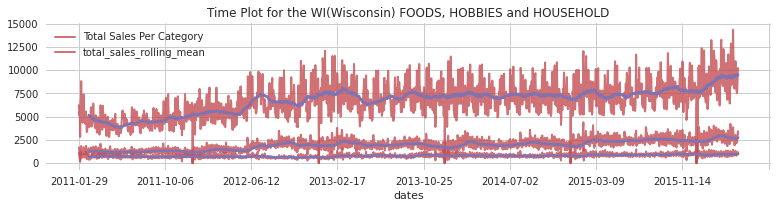

In [ ]:
time_and_rolling_plot(df_CA, 'CA(California) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
time_and_rolling_plot(df_TX, 'TX(Texas) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
time_and_rolling_plot(df_WI, 'WI(Wisconsin) FOODS, HOBBIES and HOUSEHOLD', height=2.7)
#time_and_rolling_plot(df_CA.iloc[:,1].reset_index(), "CA HOBBIES")
#time_and_rolling_plot(df_CA.iloc[:,2].reset_index(), "CA State")


Dựa vào các biểu đồ trên một vài xu hướngliên quan đến việc phân phối doanh số theo doanh mục theo bang đã trở nên rỏ ràng:
* Danh mục thức ăn, cả CA và TX để có doanh số lớn từ 12 tháng 6 đến tháng 12 tháng 9, 12 tháng 10. và có xu hướng lặp lại trong các năm 2014, 2015
* Tuy nhiên tại WI biểu đồ hơi khác, mức cao nhất diễn ra vào 12 tháng 7  và lớn nhất tiếp theo quan sát được là vào tháng 2, tháng 3. Tương tự doanh số bán hàng tăng vào tháng 9 và 13 tháng 3.
* Doanh mục gia dụng, doanh số bán hàng cao điểm trên tất cả các cửa hàng ở CA, TX và WI xảy ra vào khoảng tháng 7 và tháng 3. Trong khi doanh số bán hàng giảm tương đối nhiều xảy ra ở cả ba địa điểm vào khoảng tháng 1 đến tháng 2.
* Doanh mục sở thích, doanh số trong các ngày thương tự ở tất cả các vị trí cửa hàng. Giảm nhẹ trong tháng 8, 9

In [ ]:
train_sales_cal_df = train_sales_df.set_index('id')[d_cols].T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')
train_sales_cal_df['total_sales'] = train_sales_cal_df.sum(axis=1)

In [ ]:
item_ids = [c for c in train_sales_cal_df.columns if 'validation' in c]


In [ ]:
train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df['date'] = pd.to_datetime(train_sales_cal_df['date'])
train_sales_cal_df['month'] = train_sales_cal_df.date.dt.month
train_sales_cal_df['year'] = train_sales_cal_df.date.dt.year


In [ ]:
df = train_sales_cal_df.groupby(['year', 'month'])[item_ids].sum()
df = df.reset_index()


In [ ]:
def find_items_per_specific_date(df, year, month, category, number):
    
    '''
    finds the five most sold product_ids in user specified category, year and month
    
    inputs: df(item_ids along with year and month), year, month, category (household, 
    foods or hobbies), number (how many results to be displayed)
    
    returns : table of product ids with specfied number and date and number of sales made
    '''
    
    df = df.loc[(df['year'] == year) & (df['month'] == month)][item_ids].T.reset_index()
    df.columns = ['item_id', 'sales_count']
    df = df.set_index('item_id')
    item_type = [c for c in df.index if category in c]
    df = df[df.index.isin(item_type)]
    df = df.sort_values(by = ['sales_count'], ascending=False)[:number]
    
    return df

print("Most sold Foods during requested date\n"
      ,find_items_per_specific_date(df, 2012, 7, 'FOODS', 5) )
print("Most sold Household items during requested date\n" 
      ,find_items_per_specific_date(df, 2013, 3, 'HOUSEHOLD', 5) )

Most sold Foods during requested date
                              sales_count
item_id                                 
FOODS_3_090_CA_3_validation         8054
FOODS_3_281_CA_3_validation         3851
FOODS_3_586_TX_2_validation         3458
FOODS_3_120_CA_3_validation         2940
FOODS_3_090_CA_1_validation         2780
Most sold Household items during requested date
                                  sales_count
item_id                                     
HOUSEHOLD_1_334_CA_3_validation         1346
HOUSEHOLD_1_118_CA_3_validation         1253
HOUSEHOLD_1_351_CA_3_validation         1043
HOUSEHOLD_1_277_CA_3_validation         1014
HOUSEHOLD_1_334_TX_1_validation          914


Danh sách năm mặt hàng bán được nhiều nhất ở CA và TX.
* mặt hàng bán nhiều nhất"FOODS_3_090_CA_3_validation" giống phân tích trước đó.FOODS_3_281_CA_3_validation là mặt hàng bán nhiều thứ 2 hoàn toàn khác với phân tích trước đó.

* HOUSEHOLD_1_334_CA_3_validation: Mặt hàng gia dụng bán được nhiều nhất.


Phân phối tổng doanh số theo Store_ID

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['store_id'])[d_cols].sum()\
                                                .T.merge(calendar_df.set_index('d')['date'], 
                                                        left_index=True, right_index=True,
                                                        validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df.head(2)

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198


In [ ]:
plotly_time_plot_rolling(train_sales_cal_df, 'Store', start_col=4, end_col=7)

Biểu đồ giúp cung cấp các thông tin:
* CA_3 là cửa hàng có doanh số cao nhất
* CA_4 là cửa hàng có nhiều item bán ra củ nhất theo thời gian.
* TX_2 có nhiều mặt hàng được bán nhất trên dòng thời gian với hầu hết các mặt hàng đều đạt đỉnh vào khoảng ngày 13 tháng 9
* Các vị trí cửa hàng ở Texas (TX_1, TX_2, TX_3) đều có doanh số tăng vào khoảng 15 tháng 2 năm 2015, với mức cao nhất vào khoảng 15 tháng 8 và sau đó thấp nhất vào khoảng 15 tháng 12
* Các cửa hàng Wisconsin trải qua một mô hình khá khó đoán
* Cửa hàng WI_2 tăng tốc doanh số  vượt qua WI_3 và 12 tháng 12 và sau đó tiếp tục dẫn đầu.
* Cửa hàng WI_2, WI_1 hoạt động kém trong thời gian đầu nhưng đã có sự gia tăng về doanh số bán hàng lần lượt vào 12 tháng 7 và 12 tháng 11.


## **Phân phối doanh số bán hàng theo ngày cụ thể hoặc cuối tuần**

In [ ]:
train_sales_cal_df = train_sales_df.groupby(['cat_id'])[d_cols].sum().\
                                                T.merge(calendar_df.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

In [ ]:
train_sales_cal_df = train_sales_cal_df.reset_index()
train_sales_cal_df['date'] = pd.to_datetime(train_sales_cal_df['date'])
train_sales_cal_df['month'] = train_sales_cal_df.date.dt.month
train_sales_cal_df['day'] = train_sales_cal_df.date.dt.day
train_sales_cal_df['year'] = train_sales_cal_df.date.dt.year
train_sales_cal_df['weekday'] = train_sales_cal_df.date.dt.weekday
train_sales_cal_df['weekday'] = train_sales_cal_df.date.dt.day_name()
train_sales_cal_df.head(2)


,date,FOODS,HOBBIES,HOUSEHOLD,month,day,year,weekday
0,2011-01-29,23178,3764,5689,1,29,2011,Saturday
1,2011-01-30,22758,3357,5634,1,30,2011,Sunday


In [ ]:
df_food = train_sales_cal_df.groupby(['weekday', 'day'])['FOODS'].sum().reset_index(name='sales')
df_house = train_sales_cal_df.groupby(['weekday', 'day'])['HOUSEHOLD'].sum().reset_index(name='sales')
df_hob = train_sales_cal_df.groupby(['weekday', 'day'])['HOBBIES'].sum().reset_index(name='sales')

In [ ]:
def heatmap_plot_dates(df, title_text):

    '''
    returns the heatmap based plot for the df with time_series data in it
    
    inputs : df (dataframe with time based elements, such as weekdays, months etc.)
             title_text (text of the plot to be shown)
    returns : Heatmaps of Weekdays along number of days of a months
    '''
    fig = make_subplots(rows=1, cols=1, vertical_spacing = 0.15, 
                    subplot_titles=title_text,
                    shared_yaxes = True
                   )
    fig.add_trace( go.Heatmap(
                   z=[[df.loc[(df['day'] == day) & (df['weekday'] == weekday)]['sales'].sum()
                     for day in range(1, 31+1)] for weekday in df.weekday.unique()],
                   x=list(df.day.unique()),
                   y=list(df.weekday.unique()),
                   hoverongaps = False, 
                   colorbar = dict(title= title_text + '_Sales', 
                                   thickness=15)), row=1, col=1)
    fig.update_layout(title = title_text + '_Sale Distribution', height=2 * 20 + 300, width=1 * 700, showlegend=False)
    fig.show()

In [ ]:
heatmap_plot_dates(df_food, 'FOODS')
heatmap_plot_dates(df_hob, 'HOBBIES')
heatmap_plot_dates(df_house, 'HOUSEHOLD')